In [11]:
# import libraries
import pandas as pd
import spacy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tomotopy as tp
from collections import Counter, OrderedDict

In [2]:
# import data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,helpfulness_cat,imdb_user_review
0,1.0,It is hard to find such delightful and adorabl...
1,1.0,"They don't make films like this faded, hauntin..."
2,1.0,I first viewed this movie in 1924 at age 6 yrs...
3,1.0,I doubt that I'd ever seen anything resembling...
4,1.0,I was shocked to find myself riveted to this m...


In [4]:
print(sum(train['helpfulness_cat'])/len(train))


0.7637377963737796


In [5]:
document_lengths = np.array(list(map(len, train['imdb_user_review'].str.split(' '))))

print("The average number of words in a document is: {}.".format(np.mean(document_lengths)))
print("The minimum number of words in a document is: {}.".format(min(document_lengths)))
print("The maximum number of words in a document is: {}.".format(max(document_lengths)))

The average number of words in a document is: 175.48888888888888.
The minimum number of words in a document is: 6.
The maximum number of words in a document is: 3954.


/opt/anaconda3/envs/smm694/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of number of words'}, xlabel='Number of words', ylabel='Density'>

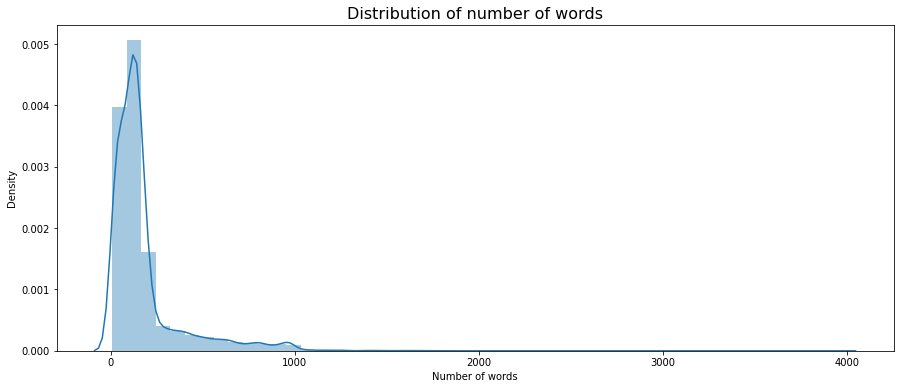

In [6]:
fig, ax = plt.subplots(figsize=(15,6))

ax.set_title("Distribution of number of words", fontsize=16)
ax.set_xlabel("Number of words")
sns.distplot(document_lengths, bins=50, ax=ax)

In [7]:
print("There are {} documents with over 1500 words.".format(sum(document_lengths > 1500)))
print("There are {} documents with max 6 words.".format(sum(document_lengths <= 6)))

There are 9 documents with over 1500 words.
There are 2 documents with max 6 words.


Word2Vec

1) create a vocabulary list for the train review 
    - filter and consolidate the vocabs
2) match each test review with the vocab list

In [9]:
# load spacy
nlp = spacy.load('en_core_web_lg')

In [19]:
# extract entities for comments
named_entities = []
for comments in train.loc[:, "imdb_user_review"].to_list():
    temp_entity_name = ''
    temp_named_entity = None
    comments = nlp(comments)
    for word in comments:
        term = word.text 
        tag = word.ent_type_
        if tag:
            temp_entity_name = ' '.join([temp_entity_name, term]).strip()
            temp_named_entity = (temp_entity_name, tag)
        else:
            if temp_named_entity:
                named_entities.append(temp_named_entity)
                temp_entity_name = ''
                temp_named_entity = None

entity_frame = pd.DataFrame(named_entities, 
                            columns=['Entity Name', 'Entity Type'])